In [16]:
import os
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torchvision import models

import scipy.ndimage as nd
import numpy as np

from torchvision import transforms
from PIL import Image

In [26]:
IMG_PATH = './pytorch-cnn-visualizations/input_images/dd_tree.jpg'

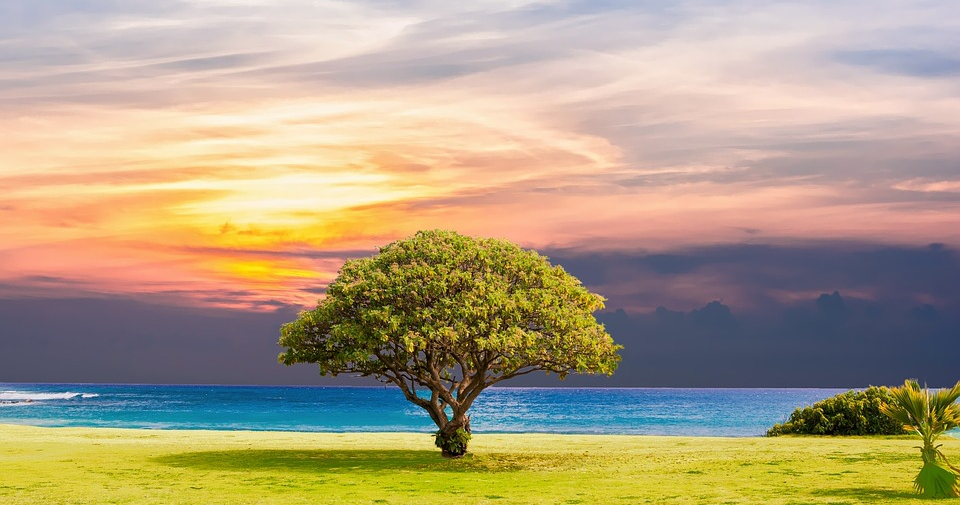

In [27]:
pil_img = Image.open(IMG_PATH)
pil_img

In [28]:
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
x = img_transform(pil_img).unsqueeze_(0).cuda()

In [6]:
model = models.alexnet(pretrained=True).cuda()

In [37]:
class DeepDream:
    def __init__(self, module, layer):
        self.module = module
        self.trace = (None, None, None)
        self.layer = layer 

    def register_hooks(self):
        def hook(module, input, output):
            self.trace = (module, input, output)
        self.layer.register_forward_hook(hook)
    
    def optim(self, image, steps):
        self.optimizer = SGD(image, lr=4,  weight_decay=1e-4)

        for _ in range(steps):
            optimizer.zero_grad()
            x = image
            for index, layer in enumerate(self.module):
                x = layer(x)                
                if layer == self.layer:
                    break
            output = self.trace[2]
            
            loss = -torch.mean(output)
            optimizer.step()

            grad = torch.norm(output)

            image += grad
        
        return image
    
    def dream(self, image, n, scale_factor):
        if n <= 0: return
        scale_factor *= scale_factor
        
        image = torch.nn.functional.interpolate(tensor, scale_factor=scale_factor)
        
        self.optim()
        
    def __call__(self, image, n_repeat=4, scale_factor=0.7):
        self.register_hooks()
        
        octaves = [image]
    
        for i in range(octave_n - 1):
            octaves.append(nd.zoom(octaves[-1], (1, 1, 1.0 / octave_scale, 1.0 / octave_scale),order=1))
            
        print(octaves)

In [9]:
dd = DeepDream(model, model.features[3])
dd()

TypeError: __call__() missing 1 required positional argument: 'image'

In [35]:
def plot_tensor(tensor):
    tensor = torch.nn.functional.interpolate(tensor, scale_factor=0.7)
    img = transforms.ToPILImage()(tensor.squeeze().cpu())
    
    return img

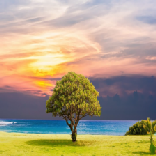

In [36]:
plot_tensor(x)

In [12]:
np_img = cv2.imread(IMG_PATH)
octaves = [np.expand_dims(np_img,0)]
octave_n = 6
octave_scale = 1.4
for i in range(octave_n - 1):
    octaves.append(nd.zoom(octaves[-1], (1, 1, 1.0 / octave_scale, 1.0 / octave_scale),order=1))

/home/francesco/.local/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [17]:
def guassian_filter(*args, **kwargs):
    conv = nn.Conv2d()
    
    g_weights = nd.filters.gaussian_filter(*args, **kwargs)
    conv.weight.data.copy_(torch.from_numpy(generated_filters))
    
    return conv

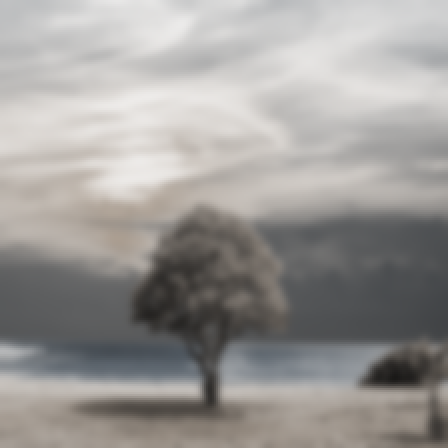

In [34]:
bluerred = nd.filters.gaussian_filter(x.cpu().numpy(),sigma=2)

bluerred = torch.from_numpy(bluerred)

plot_tensor(bluerred)

In [ ]:
for octave in octaves:
    print(octave.shape)
    tensor = transforms.functional.to_pil_image(octave.squeeze())
    tensor = transforms.functional.to_tensor(tensor)
    img = plot_tensor(tensor)
    img.show()

In [43]:
a = [1,2]

for i, j in zip(a[1::-1], a[0::-1]):
    print(i,j)

2 1
